# Info

[Kaggle: Marketing Analytics](https://www.kaggle.com/datasets/jackdaoud/marketing-data)

| Feature | Description |
| --- | --- |
| AcceptedCmp(N) | 1 if costumer accepted the offer in the (N)st campaign, 0 therwise |
| Respons (TTarget) | 1 if costumer accepted the offer in the last campaign, 0 therwise |
| Complain | if costumer complained in the last 2 years |
| DtCustormer | date of customer's enrollment with the company |
| Education | customer's level of education |
| Marital | customer's marital status |
| Kidhome | number of small children in customer's household |
| Teenhome | number of teenagers in customer's household |
| Income | customer's yearly household income |
| Mnt(Product) | amount spent on (Product) in the last 
| Num(Type)Purchases | number of purchases made with (Type) |
| Recency | number of days sisce the last purchase |2 years |dy>
</table> <td></td>
      <td></td>
    </tr>
  </tbody>
</table>

# Imports & Settings

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns

In [136]:
sns.set_theme(style='whitegrid', palette='pastel')
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

# EDA

## Load dataset

In [137]:
df = pd.read_csv('../../../../data/kaggle_marketing_analytics.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


## List of columns

In [179]:
len(list(df.columns))

39

## Income

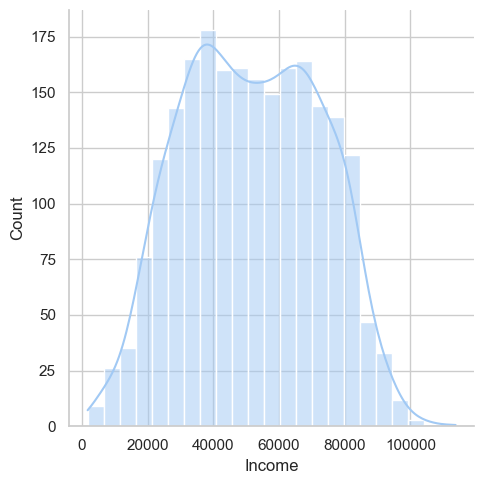

In [141]:
sns.displot(data=df.Income, kde=True)

## Number of children in a customer's household

In [152]:
children_cols = ['Kidhome', 'Teenhome']

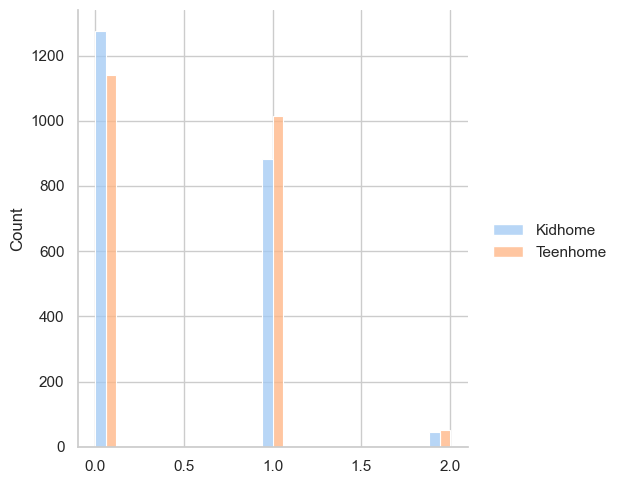

In [178]:
sns.displot(data=df[children_cols], 
            multiple='dodge')

## Amount spent on product types in the last 2 years

In [139]:
mnt_cols = [col for col in df.columns if 'Mnt' in col]
mnt_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'MntTotal',
 'MntRegularProds']

In [140]:
edu_cols = [col for col in df.columns if 'educa' in col]
edu_cols

['education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']

In [129]:
mnt_sum = df[mnt_cols].sum().sort_values()
mnt_sum

MntFruits             58219
MntSweetProducts      59818
MntFishProducts       83253
MntGoldProds          97146
MntMeatProducts      364513
MntWines             675093
MntRegularProds     1143750
MntTotal            1240896
dtype: int64

<Axes: >

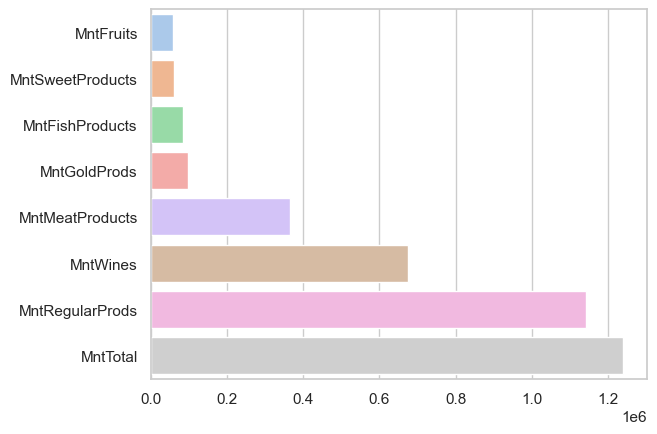

In [131]:
sns.barplot(y=mnt_sum.index, x=mnt_sum.values, orient='h')

In [132]:
edu_sum = df[edu_cols].sum().sort_values()
edu_sum

education_Basic           54
education_2n Cycle       198
education_Master         364
education_PhD            476
education_Graduation    1113
dtype: int64

In [133]:
edu_count.values

array([ 198,   54, 1113,  364,  476], dtype=int64)

<Axes: >

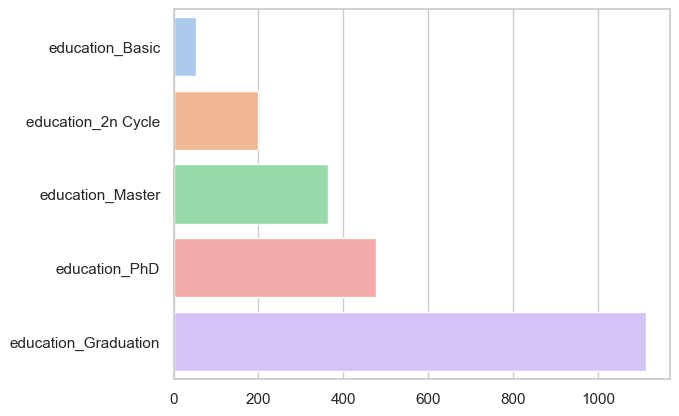

In [134]:
sns.barplot(y=edu_sum.index, x=edu_sum.values, orient='h')